In [24]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from tqdm import tqdm
import matplotlib as mpl
from scipy.stats import binned_statistic_2d
from numba import njit
import h5py as h5
import os

In [77]:
fid = arepo.Snapshot('lvl4/MW.hdf5')
new = arepo.Snapshot('lvl4-beta/MW.hdf5')
new05 = arepo.Snapshot('lvl4-beta/MW-beta05.hdf5')

In [60]:
def gas_profile(sni, rmax=300, dr=1):
    # center = np.array([sni.BoxSize, sni.BoxSize, sni.BoxSize])/2.
    center = np.array([300, 300, 300])

    # print(center)
    pos = sni.part0.pos - center
    r = np.linalg.norm(pos, axis=1)
    
    # print(np.min(r))
    
    rmin = 0
    
    out = {}
    out['rlist'] = []
    out['rholist'] = []
    
    while rmin < rmax:
        key = np.logical_and(r >= rmin, r < rmin + dr)
        
        Menc = np.sum(sni.part0.mass[key])
        vol = (4 * np.pi/3.) * ((rmin + dr)**3 - rmin**3)
        
        aver = np.mean(r[key])
        
        out['rlist'].append(aver)
        out['rholist'].append(Menc/vol)
        
        rmin += dr
    
    out['rlist'] = np.array(out['rlist'])
    out['rholist'] = np.array(out['rholist'])
    
    return out

In [61]:
out_fid = gas_profile(fid)
out_new = gas_profile(new)
out_new05 = gas_profile(new05)

In [67]:
def beta_analytic(r, RHO0, RC, beta):
    rholist = RHO0 * (1 + (r/RC)**2)**(-1.5*beta)
    return rholist

1.2244862337131457e-07


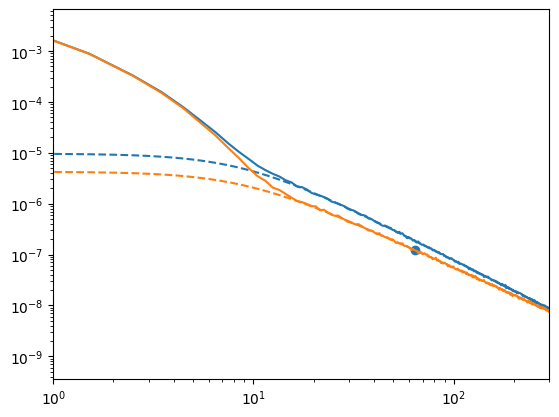

In [70]:
RC = 9
rlist = np.logspace(-3, 3, 1000)

l = plt.plot(out_new['rlist'], out_new['rholist'])
RHO0 = 9.60835e-06
beta = 2./3.
rholist = beta_analytic(rlist, RHO0, RC, beta)
plt.plot(rlist, rholist, c=l[0].get_color(), ls='dashed')

l = plt.plot(out_new05['rlist'], out_new05['rholist'])
# RHO0 = 1.19239e-06
# beta = 1./2.
RHO0 = 4.2446e-06
beta = 0.6
rholist = beta_analytic(rlist, RHO0, RC, beta)
plt.plot(rlist, rholist, c=l[0].get_color(), ls='dashed')

print(beta_analytic(63.895, RHO0, RC, beta))
plt.scatter(63.895, beta_analytic(63.895, RHO0, RC, beta))

plt.xlim(1, 300)
plt.xscale('log')
plt.yscale('log')

In [33]:
print(np.sum(fid.part0.mass))
print(np.sum(new.part0.mass))
print(np.sum(new05.part0.mass))

3.5990098
3.5990098
2.038558


In [34]:
print(fid.NumPart_Total)
print(new.NumPart_Total)
print(new05.NumPart_Total)

[ 599682 1596839   99802  133070       0       0]
[ 599682 1596839   99802  133070       0       0]
[ 339673 1596839   99802  133070       0       0]


In [40]:
r = np.linalg.norm(fid.part0.pos - np.array([300, 300, 300]), axis=1)
print(np.sum(fid.part0.mass[r<30]))

r = np.linalg.norm(new.part0.pos - np.array([300, 300, 300]), axis=1)
print(np.sum(new.part0.mass[r<30]))

r = np.linalg.norm(new05.part0.pos - np.array([300, 300, 300]), axis=1)
print(np.sum(new05.part0.mass[r<30]))

0.3305044
0.3305044
0.0017404447


In [54]:
print(np.median(fid.part0.pos, axis=0))
print(np.median(new.part0.pos, axis=0))
print(np.median(new05.part0.pos, axis=0))

[299.92578 299.95374 300.00394]
[299.92578 299.95374 300.00394]
[299.93353 299.9922  300.0029 ]


In [41]:
print(np.min(r), np.median(r), np.max(r))

5.333117332601769 258.2094918158452 678.4791444859537


In [22]:
r0 = 30
dr = 2
key = np.logical_and(r > r0-dr/2., r < r0+dr/2.)
vol = (4*np.pi/3) * ((r0+dr/2.)**3 - (r0-dr/2.)**3)
mass = np.sum(fid.part0.mass[key])
print(mass/vol)

7.76056491191264e-07


In [78]:
dir(new05.part0)

['Coordinates',
 'GFM_Metallicity',
 'GFM_Metals',
 'InternalEnergy',
 'Masses',
 'ParticleIDs',
 'PassiveScalars',
 'Velocities',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_num',
 '_parent',
 'data',
 'gmet',
 'gz',
 'id',
 'mass',
 'pos',
 'u',
 'vel']

In [76]:
dir(fid.part0)

['Coordinates',
 'GFM_Metallicity',
 'GFM_Metals',
 'InternalEnergy',
 'Masses',
 'ParticleIDs',
 'PassiveScalars',
 'Velocities',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_num',
 '_parent',
 'data',
 'gmet',
 'gz',
 'id',
 'mass',
 'pos',
 'u',
 'vel']